## day1_ml study

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#표 정확하게 나타나는 코드
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

#### 데이터 준비하기

In [3]:
# 결측치 처리하기 (꼭 결측치를 처리해줘야함!)

data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [4]:
# 결측치 값 채우기
data.fillna(method='ffill', inplace=True)

data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [5]:
#불필요한 변수 제거하기
col_x=['Month','Day']
data.drop(col_x, axis=1, inplace=True)

data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [6]:
#x, y 분리 / 분리할 때 타겟으로 변수를 지정해주고 분리한다

target = 'Ozone'

x = data.drop(target, axis=1)
y = data.loc[:,target]

In [8]:
#묘듈 불러오기 & 7:3으로 분리하기

from sklearn.model_selection import train_test_split

#이때, x_train 다음 x_test가 온다! y_train으로 작성하지 않기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 모델링

> 모델링을 하기 전에 회귀문제인지 분류문제인지 꼭 구분하기

모델 : LinearRegression 
평가 : mean_absolute_error

1단계-불러오기 / 2단계-선언하기 / 3단계-학습하기 / 4단계-예측하기 / 5단계-평가하기

In [10]:
# 불러오기

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [11]:
# 선언하기
model = LinearRegression()

In [12]:
# 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# 예측하기
y_pred = model.predict(x_test)

In [16]:
# 평가하기
print(mean_absolute_error(y_test, y_pred))

16.194208957399518


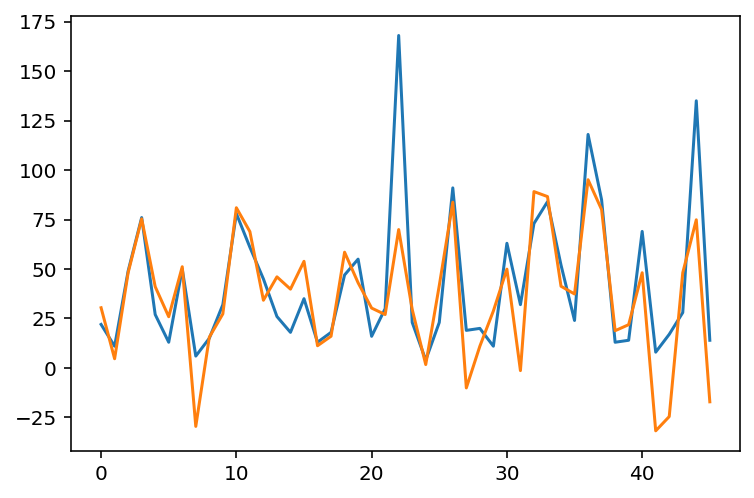

In [18]:
# 시각화로 나타내기

mean_air = y_test.values.mean()

plt.plot(y_test.values)
plt.plot(y_pred)
plt.show()